In [1]:
# !pip install ghostscript
# !pip install camelot-py

In [2]:
!pip install pdf2image

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install https://github.com/myhub/tr/archive/1.5.1.zip

     \ 177.5 MB 16.7 MB/s
  Created wheel for tr: filename=tr-1.5.0-py3-none-any.whl size=162900369 sha256=dddef669f6c2ac708f02a03343f509d1bfdf138cad804ef4a46f6fc3ea428c62
  Stored in directory: /tmp/pip-ephem-wheel-cache-zwskv9vq/wheels/e8/24/f6/fa325b41760077cc82fdb1745a4cb3ef7f6ac8fd8c5f37e6f2
Successfully built tr


In [7]:
from tr import *
from PIL import Image, ImageDraw, ImageFont


In [8]:
img_pil = Image.open("/content/drive/MyDrive/NLP/img1.jpg")
MAX_SIZE = 2000
if img_pil.height > MAX_SIZE or img_pil.width > MAX_SIZE:
    scale = max(img_pil.height / MAX_SIZE, img_pil.width / MAX_SIZE)

    new_width = int(img_pil.width / scale + 0.5)
    new_height = int(img_pil.height / scale + 0.5)
    img_pil = img_pil.resize((new_width, new_height), Image.BICUBIC)

print(img_pil.width, img_pil.height)
# img_pil

463 894


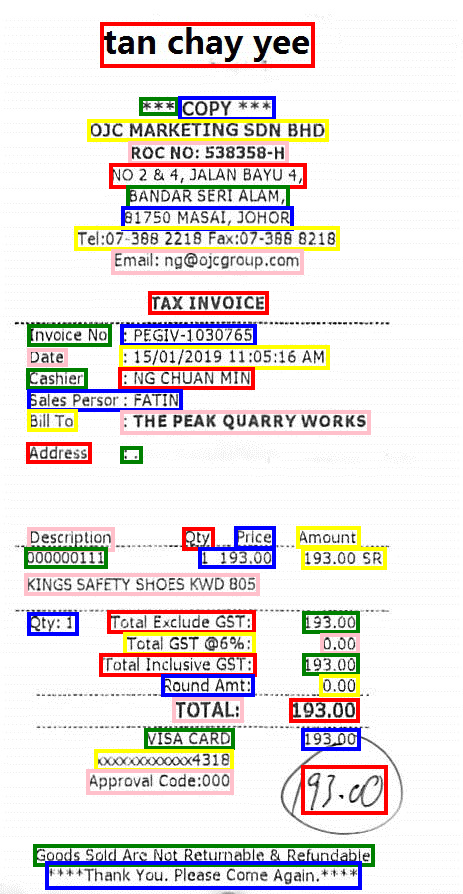

In [9]:
gray_pil = img_pil.convert("L")

rect_arr = detect(img_pil, FLAG_RECT)

img_draw = ImageDraw.Draw(img_pil)
colors = ['red', 'green', 'blue', "yellow", "pink"]

for i, rect in enumerate(rect_arr):
    x, y, w, h = rect
    img_draw.rectangle(
        (x, y, x + w, y + h),
        outline=colors[i % len(colors)],
        width=4)

img_pil

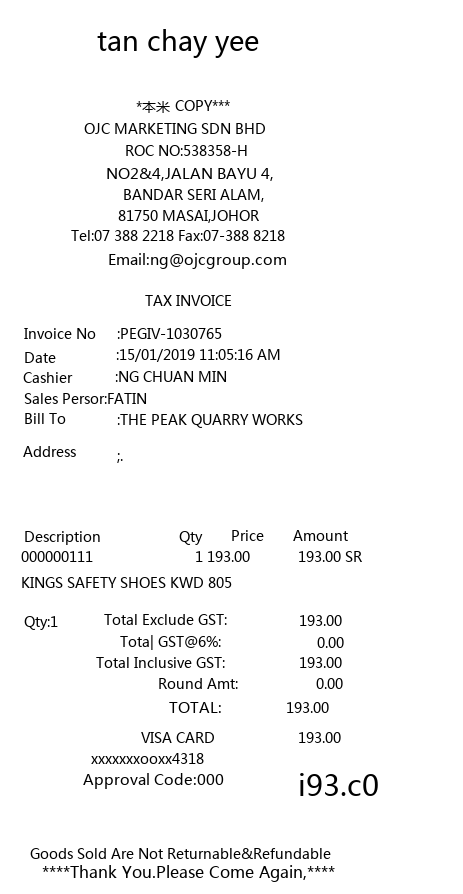

In [11]:
blank_pil = Image.new("L", img_pil.size, 255)
blank_draw = ImageDraw.Draw(blank_pil)

results = run(gray_pil)
for line in results:
    x, y, w, h = line[0]
    txt = line[1]
    font = ImageFont.truetype("/content/drive/MyDrive/NLP/msyh.ttf", max(int(h * 0.6), 14))
    blank_draw.text(xy=(x, y), text=txt, font=font)

blank_pil

# Read partial area of PDF
If you want to set a certain part of page, you can use area option.

**Note that as of tabula-py 2.0.0**, multiple_tables option became True so if you want to use multiple area options like [[0, 0, 100, 50], [0, 50, 100, 100]], you need to set multiple_tables=False